**Sample ID**: CM319_base


**Query**:

I have already left the house and it's garbage day. Send an email to Smith if the garbage bins are out front.


**DB Type**: Base Case


**Case Description**:

The user has already left the house on garbage day and is unsure whether the bins were placed outside. The Front camera footage shows that the garbage bins are visible at the edge of the lawn, confirming they were put out. A contact named "Smith" is saved in the contacts with the email "smith1234@gmail.com". An email has to be sent to "smith1234@gmail.com".

**Global/Context Variables:**

**APIs:**
- sdm
- gmail
- contacts

# Set Up

## Download relevant files

In [1]:
import io
import os
import sys
import zipfile
import shutil
import re
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload

VERSION = "0.1.4"  # Pass the version of the API
CONTENT_DIR = '/content'
APIS_DIR = os.path.join(CONTENT_DIR, 'APIs')
DBS_DIR = os.path.join(CONTENT_DIR, 'DBs')
SCRIPTS_DIR = os.path.join(CONTENT_DIR, 'Scripts')
FC_DIR = os.path.join(CONTENT_DIR, 'Schemas')
ZIP_PATH = os.path.join(CONTENT_DIR, f'APIs_V{VERSION}.zip')

APIS_FOLDER_ID = '1QpkAZxXhVFzIbm8qPGPRP1YqXEvJ4uD4'
ITEMS_TO_EXTRACT = ['APIs/', 'DBs/', 'Scripts/', 'Schemas/']

# Cleanup
for path in [APIS_DIR, DBS_DIR, SCRIPTS_DIR, FC_DIR, ZIP_PATH]:
    if os.path.exists(path):
        if os.path.isdir(path):
            shutil.rmtree(path)
        else:
            os.remove(path)

# Auth
auth.authenticate_user()
drive_service = build('drive', 'v3')

def download_drive_file(service, file_id, output_path, file_name=None, show_progress=True):
    request = service.files().get_media(fileId=file_id)
    with io.FileIO(output_path, 'wb') as fh:
        downloader = MediaIoBaseDownload(fh, request)
        done = False
        while not done:
            status, done = downloader.next_chunk()
            if show_progress:
                print(f"Download progress: {int(status.progress() * 100)}%")

print(f"Searching for APIs zip file with version {VERSION} in folder: {APIS_FOLDER_ID}...")
apis_file_id = None
try:
    query = f"'{APIS_FOLDER_ID}' in parents and trashed=false"
    results = drive_service.files().list(q=query, fields="files(id, name)").execute()
    for file in results.get('files', []):
        if file['name'].lower() == f'apis_v{VERSION.lower()}.zip':
            apis_file_id = file['id']
            print(f"Found: {file['name']} (ID: {apis_file_id})")
            break
except Exception as e:
    print(f"Error listing files: {e}")

if not apis_file_id:
    sys.exit(f"❌ APIs zip V{VERSION} not found.")

print(f"Downloading APIs zip {apis_file_id}...")
download_drive_file(drive_service, apis_file_id, ZIP_PATH)

print(f"Extracting {ZIP_PATH}...")
with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
    for member in zip_ref.namelist():
        if any(member.startswith(p) for p in ITEMS_TO_EXTRACT):
            zip_ref.extract(member, CONTENT_DIR)

os.remove(ZIP_PATH)

if os.path.exists(APIS_DIR):
    sys.path.append(APIS_DIR)

for p in [APIS_DIR, DBS_DIR, SCRIPTS_DIR]:
    print(f"{'✅' if os.path.exists(p) else '❌'} {p}")

# PWS: Copy pws_image_data folder in /content/pws_image_data
print(f"\nDownloading all files from pws_images_data Drive folder.")
IMAGES_ZIP_ID = '1MlgE9LnFA221ARh9l4nbF1yGc215KDN_'
IMAGES_ZIP_PATH = os.path.join(CONTENT_DIR, 'pws_images_data.zip')
download_drive_file(drive_service, IMAGES_ZIP_ID, IMAGES_ZIP_PATH, file_name='pws_images_data.zip')

print(f"Extracting images from {IMAGES_ZIP_PATH} to {CONTENT_DIR}...")
try:
    with zipfile.ZipFile(IMAGES_ZIP_PATH, 'r') as zip_ref:
        zip_ref.extractall(CONTENT_DIR)

except zipfile.BadZipFile:
    print(f"Error: The downloaded file at {IMAGES_ZIP_PATH} is not a valid zip file.")
    sys.exit("Invalid zip file downloaded.")
except Exception as e:
    print(f"An error occurred during extraction: {e}")
    sys.exit("Extraction failed.")

if os.path.exists(IMAGES_ZIP_PATH):
    os.remove(IMAGES_ZIP_PATH)

Searching for APIs zip file with version 0.1.4 in folder: 1QpkAZxXhVFzIbm8qPGPRP1YqXEvJ4uD4...
Found: APIs_V0.1.4.zip (ID: 1TnAaWGfVrMxWTilyhy46-Aue_bh0XkNk)
Download progress: 100%
Extracting /content/APIs_V0.1.4.zip...
✅ /content/APIs
✅ /content/DBs
✅ /content/Scripts

Download progress: 78%
Download progress: 100%
Extracting images from /content/pws_images_data.zip to /content...


## Install Dependencies and Clone Repositories

In [2]:
!pip install uv
!uv pip install -r /content/APIs/requirements.txt
!uv pip install jsonpath_ng

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.4/21.4 MB 63.4 MB/s eta 0:00:00
Using Python 3.12.12 environment at: /usr
Resolved 161 packages in 2.32s
Prepared 58 packages in 2.19s
Uninstalled 16 packages in 59ms
Installed 58 packages in 101ms
 + anthropic==0.72.0
 - beautifulsoup4==4.13.5
 + beautifulsoup4==4.13.4
 - bleach==6.3.0
 + bleach==6.2.0
 + bracex==2.6
 + coverage==7.8.0
 + cssselect==1.3.0
 + deepdiff==8.6.0
 + dnspython==2.8.0
 + docopt==0.6.2
 - docstring-parser==0.17.0
 + docstring-parser==0.16
 - duckdb==1.3.2
 + duckdb==1.3.0
 + email-validator==2.2.0
 + ete3==3.1.3
 + freezegun==1.5.2
 - google-genai==1.46.0
 + google-genai==1.38.0
 + jedi==0.19.2
 + json-repair==0.44.1
 + jsonpath-ng==1.7.0
 + langchain-anthropic==0.3.19
 + langchain-openai==0.3.30
 + levenshtein==0.27.1
 + libcst==1.8.2
 + lxml-html-clean==0.4.3
 - mcp==1.19.0
 + mcp==1.12.4
 + mermaid-python==0.1
 + mongomock==4.3.0
 - openpyxl==3.1.5
 + openpyxl==3.1.2
 + orderly-set==5.5.0
 + phonenumbers==9.0.1

## Import APIs and initiate DBs

In [12]:
import contacts
from contacts.SimulationEngine.custom_errors import ContactNotFoundError

scenario_db = {'environment': {'home_assistant': {'devices': {'LIGHT_001': {'attributes': {'brightness': 1.0,
                                                                             'company': 'Crompton',
                                                                             'model': '4Ft.22W',
                                                                             'serial_number': 'C907890',
                                                                             'state': 'Off',
                                                                             'supports_color': 'No'},
                                                              'name': 'Living '
                                                                      'Room '
                                                                      'Light 1',
                                                              'type': 'Light'},
                                                'LIGHT_002': {'attributes': {'brightness': 1.0,
                                                                             'company': 'Crompton',
                                                                             'model': '4Ft.22W',
                                                                             'serial_number': 'C847116',
                                                                             'state': 'Off',
                                                                             'supports_color': 'No'},
                                                              'name': 'Living '
                                                                      'Room '
                                                                      'Light 2',
                                                              'type': 'Light'},
                                                'LIGHT_003': {'attributes': {'brightness': 0.8,
                                                                             'company': 'Crompton',
                                                                             'model': '3Ft.15W',
                                                                             'serial_number': 'C170567',
                                                                             'state': 'On',
                                                                             'supports_color': 'No'},
                                                              'name': 'Kitchen '
                                                                      'Light',
                                                              'type': 'Light'},
                                                'LIGHT_004': {'attributes': {'brightness': 1.0,
                                                                             'color': '#FFFFFF',
                                                                             'company': 'Crompton '
                                                                                        'Multi-Color',
                                                                             'model': '4Ft.22W '
                                                                                      '- '
                                                                                      '3 '
                                                                                      'in '
                                                                                      '1',
                                                                             'serial_number': 'C956341',
                                                                             'state': 'Off',
                                                                             'supports_color': 'Yes'},
                                                              'name': 'GuestRoom '
                                                                      'Light',
                                                              'type': 'Light'},
                                                'LIGHT_005': {'attributes': {'brightness': 1.0,
                                                                             'color': '#FFFFFF',
                                                                             'company': 'Crompton '
                                                                                        'Multi-Color',
                                                                             'model': '4Ft.22W '
                                                                                      '- '
                                                                                      '3 '
                                                                                      'in '
                                                                                      '1',
                                                                             'serial_number': 'C9563571',
                                                                             'state': 'Off',
                                                                             'supports_color': 'Yes'},
                                                              'name': 'StudyRoom '
                                                                      'Light',
                                                              'type': 'Light'}}},
                 'sdm': {'devices': {'CAM_001': {'attributes': {'company': 'Google',
                                                                'model': 'Google '
                                                                         'Nest '
                                                                         'Cam '
                                                                         'Indoor',
                                                                'parent': 'enterprises/house-system-797896/structures/STRCT2/rooms/ROOM1',
                                                                'serial_number': 'GNC-I-29000',
                                                                'state': 'On'},
                                                 'name': 'LivingRoom Cam',
                                                 'type': 'Camera'},
                                     'CAM_002': {'attributes': {'company': 'Google',
                                                                'model': 'Google '
                                                                         'Nest '
                                                                         'Cam '
                                                                         'Indoor',
                                                                'parent': 'enterprises/house-system-797896/structures/STRCT2/rooms/ROOM2',
                                                                'serial_number': 'GNC-I-880000',
                                                                'state': 'On'},
                                                 'name': 'Kitchen Cam',
                                                 'type': 'Camera'},
                                     'CAM_003': {'attributes': {'company': 'Google',
                                                                'model': 'Google '
                                                                         'Nest '
                                                                         'Cam '
                                                                         'Outdoor',
                                                                'parent': 'enterprises/house-system-797896/structures/STRCT1/rooms/OUT1',
                                                                'serial_number': 'GNC-O-880000',
                                                                'state': 'On'},
                                                 'name': 'FrontDoor Cam',
                                                 'type': 'Camera'}},
                         'structures': [{'name': 'enterprises/house-system-797896/structures/STRCT1',
                                         'traits': {'sdm.structures.traits.Info': {'customName': 'House '
                                                                                                 '- '
                                                                                                 'Outdoors'}}},
                                        {'name': 'enterprises/house-system-797896/structures/STRCT2',
                                         'traits': {'sdm.structures.traits.Info': {'customName': 'House '
                                                                                                 '- '
                                                                                                 'Indoors'}}}]}},
 'project_id': 'house-system-797896'}

image_map = {'cameras': {'CAM_001': [{'expected': 'No',
                          'image_path': './pws_image_data/06_10_25 '
                                        '14_17_43.png'}],
             'CAM_002': [{'expected': 'No',
                          'image_path': './pws_image_data/2025-05-23_1348_cam.jpg'}],
             'CAM_003': [{'expected': 'Yes',
                          'image_path': './pws_image_data/06_10_25 '
                                        '07_29_42.png'}]},
 'events': []}


import json

with open("/content/scenario_db.json", "w") as f:
    json.dump(scenario_db, f)

with open("/content/image_map.json", "w") as f:
    json.dump(image_map, f)


import os
import json

import gmail
import sdm

# Initialize DBs
gmail.SimulationEngine.db.load_state("/content/DBs/GmailDefaultDB.json")
sdm.SimulationEngine.db.load_state(f"/content/scenario_db.json")

# Print the DBs
print(f"SDM DB: {sdm.SimulationEngine.db.DB}")
print(f"Gmail DB: {gmail.SimulationEngine.db.DB}")

# Load image map for this task
with open("/content/image_map.json", "r") as f:
    image_map = json.load(f)

# Print the Image Map
print(f"Image Map: {image_map}")

# Reset states
sdm.devices.commands.reset_served_images()
sdm.SimulationEngine.db.reset_state_env()
contacts.SimulationEngine.db.load_state("/content/DBs/ContactsDefaultDB.json")

# Initialize image map
sdm.SimulationEngine.db.update_state_dict(image_map)

# Set events
sdm.SimulationEngine.events.set_cameras_events(image_map, sdm.SimulationEngine.db.DB.get("project_id", ""))

try:
    contacts.get_contact("smith1234@gmail.com")
except ContactNotFoundError:
  contacts.create_contact(given_name='Smith', email='smith1234@gmail.com')

SDM DB: {'environment': {'home_assistant': {'devices': {'LIGHT_001': {'attributes': {'brightness': 1.0, 'company': 'Crompton', 'model': '4Ft.22W', 'serial_number': 'C907890', 'state': 'Off', 'supports_color': 'No'}, 'name': 'Living Room Light 1', 'type': 'Light'}, 'LIGHT_002': {'attributes': {'brightness': 1.0, 'company': 'Crompton', 'model': '4Ft.22W', 'serial_number': 'C847116', 'state': 'Off', 'supports_color': 'No'}, 'name': 'Living Room Light 2', 'type': 'Light'}, 'LIGHT_003': {'attributes': {'brightness': 0.8, 'company': 'Crompton', 'model': '3Ft.15W', 'serial_number': 'C170567', 'state': 'On', 'supports_color': 'No'}, 'name': 'Kitchen Light', 'type': 'Light'}, 'LIGHT_004': {'attributes': {'brightness': 1.0, 'color': '#FFFFFF', 'company': 'Crompton Multi-Color', 'model': '4Ft.22W - 3 in 1', 'serial_number': 'C956341', 'state': 'Off', 'supports_color': 'Yes'}, 'name': 'GuestRoom Light', 'type': 'Light'}, 'LIGHT_005': {'attributes': {'brightness': 1.0, 'color': '#FFFFFF', 'company'

# Initial Assertion
1. Assert that a contact named Smith exists.
2. Assert that no email has been sent to "smith1234@gmail.com".

In [13]:
import gmail
import contacts

# Context variable
recipient_email = "smith1234@gmail.com"

# Construct Gmail search query
query = f'to:{recipient_email}'

# List matching messages
list_of_emails = gmail.list_messages(userId="me", q=query)

# 1. Assert that a contact Me Exist

contact_me = contacts.list_contacts('Smith')
assert len(contact_me.get('contacts', [])) == 1, "There are no contacts named Smith or more than one was found."

# 2. Assert that no email has been sent yet.
assert len(list_of_emails.get("messages", [])) == 0, (
    f"There are {len(list_of_emails.get('messages'))} emails, expected it to be 0."
)

# Action
* Locate Front Door camera
* Access current footage "06/10/25 07:29:42"
* This camera shows the view of the front step, yard, and street
* There are two garbage bins placed at the edge of the lawn, next to the street
* List all contacts and select the relevant email ID.
* Send an email to the selected email ID with a message confirming that the garbage bin has been taken out.


In [5]:
import gmail
import sdm
from IPython.display import Image, display
import base64

def display_base64_image(image_base64):
    """Helper function to display a base64 image"""
    base64_string = image_base64.split(':')[1].strip()

    try:
        missing_padding = len(base64_string) % 4
        if missing_padding:
            base64_string += '=' * (4 - missing_padding)
        image_data = base64.b64decode(base64_string)
    except Exception as e:
        print(f"Error decoding base64 string: {e}")
        image_data = None

    if image_data:
        display(Image(data=image_data))

# List all sdm devices
sdm_devices = sdm.list_devices()
print(f"All available SDM devices: {sdm_devices}")

All available SDM devices: {'devices': [{'name': 'enterprises/house-system-797896/devices/CAM_001', 'type': 'sdm.devices.types.CAMERA', 'traits': {'sdm.devices.traits.CameraEventImage': {}, 'sdm.devices.traits.CameraImage': {'maxImageResolution': {'width': 1280, 'height': 960}}, 'sdm.devices.traits.CameraLiveStream': {'maxVideoResolution': {'width': 640, 'height': 480}, 'videoCodecs': ['H264'], 'audioCodecs': ['AAC'], 'supportedProtocols': ['RTSP', 'WEB_RTC']}, 'sdm.devices.traits.CameraMotion': {}, 'sdm.devices.traits.CameraPerson': {}, 'sdm.devices.traits.CameraSound': {}, 'sdm.devices.traits.Info': {'customName': 'LivingRoom Cam'}}, 'project_id': 'house-system-797896', 'parentRelations': [{'parent': 'enterprises/house-system-797896/structures/STRCT2/rooms/ROOM1', 'displayName': 'LivingRoom Cam'}]}, {'name': 'enterprises/house-system-797896/devices/CAM_002', 'type': 'sdm.devices.types.CAMERA', 'traits': {'sdm.devices.traits.CameraEventImage': {}, 'sdm.devices.traits.CameraImage': {'m

In [6]:
# Set required ids

# Assuming "FrontDoor Cam" is the Front Door Camera
front_door_cam_id = "CAM_003"
project_id = "house-system-797896"

# 2. Load front door cam image
# Start RTSP stream
generate_stream_command = {"command": "sdm.devices.commands.generate_rtsp_stream",
                           "params": {}
                           }
generate_stream_output = sdm.execute_command(device_id=front_door_cam_id, project_id=project_id, command_request=generate_stream_command)

# Inspect stream output
print(f"Generated stream output: {generate_stream_output}")

Generated stream output: {'results': {'streamUrls': {'rtspUrl': 'rtsps://sdmvideostream.com/Zy4wLnN0cmVhbWluZ1Rva2VuLi9wd3NfaW1hZ2VfZGF0YS8wNl8xMF8yNSAwN18yOV80Mi5wbmc=?auth=g.0.streamingToken'}, 'streamExtensionToken': 'IN5vY1BqRPG9rnqhYowdXw', 'streamToken': 'g.0.streamingToken', 'expiresAt': '2025-10-30T17:57:29.965134'}}


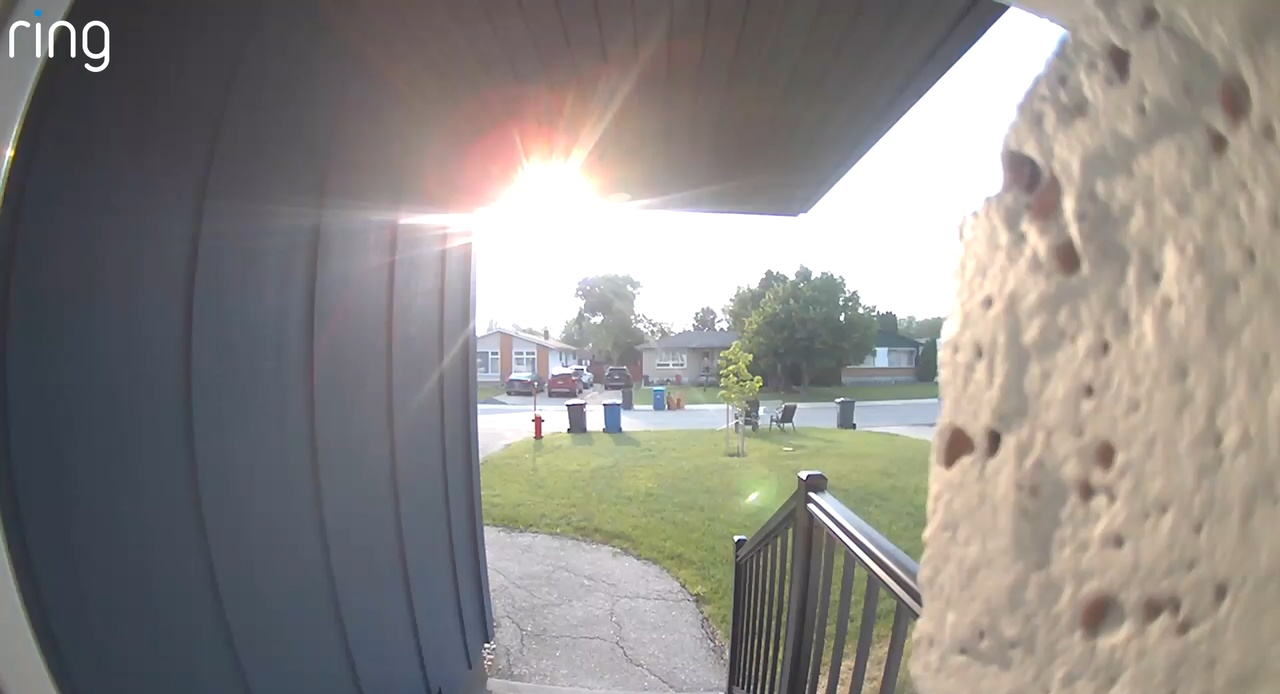

In [7]:
# Get image from stream
generate_image_command = {"command": "sdm.devices.commands.generate_image_from_rtsp_stream",
                          "params": {
                              "rtsp_url": generate_stream_output.get("results", {}).get("streamUrls", "").get("rtspUrl", "")
                              }
                          }
image_1 = sdm.execute_command(device_id=front_door_cam_id, project_id=project_id, command_request=generate_image_command)

# Stop RTSP stream
stop_stream_command = {"command": "sdm.devices.commands.stop_rtsp_stream",
                       "params": {
                           "stream_extension_token": generate_stream_output.get("results", {}).get("streamExtensionToken", "")
                           }
                       }
stop_stream_output = sdm.execute_command(device_id=front_door_cam_id, project_id=project_id, command_request=stop_stream_command)

# THIS IS JUST FOR DEBUGGING, WILL BE REMOVED
display_base64_image(image_1)

In [8]:
# Mock reply from Gemini
print("The image confirms that the garbage bins are placed out front. An email will be sent to let the user know.")

The image confirms that the garbage bins are placed out front. An email will be sent to let the user know.


In [9]:
contacts.list_contacts()

{'contacts': [{'resourceName': 'people/c1a2b3c4-d5e6-f7a8-b9c0-d1e2f3a4b5c6',
   'etag': 'aBcDeFgHiJkLmNoPqRsTuVwXyZ',
   'names': [{'givenName': 'John', 'familyName': 'Doe'}],
   'emailAddresses': [{'value': 'john.doe@example.com',
     'type': 'home',
     'primary': True}],
   'phoneNumbers': [{'value': '+14155552671',
     'type': 'mobile',
     'primary': True},
    {'value': '+14155552672', 'type': 'work', 'primary': False}],
   'organizations': [{'name': 'Google',
     'title': 'Software Engineer',
     'department': None,
     'primary': False}],
   'isWorkspaceUser': None,
   'notes': None,
   'whatsapp': None,
   'phone': None},
  {'resourceName': 'people/19876543210@s.whatsapp.net',
   'etag': 'wHaTsApP1EtAg123456',
   'names': [{'givenName': 'Jane', 'familyName': 'Doe'}],
   'emailAddresses': [],
   'phoneNumbers': [{'value': '+14155552673',
     'type': 'mobile',
     'primary': True}],
   'organizations': [],
   'isWorkspaceUser': None,
   'notes': None,
   'whatsapp': {'

In [10]:
# Retrieved Smith's email from the list of contacts output
recipient_email = "smith1234@gmail.com"

# Sending email
sender_email = gmail.get_user_profile("me").get("emailAddress", "")
subject = "Garbage Bins Confirmation"
message_text = (
    "Hi,\n\n"
    "Confirmation: The garbage bins have been taken out\n"
)

# Message Dictionary
msg_dictionary = {
    'sender': sender_email,
    'recipient': recipient_email,
    'subject': subject,
    'body': message_text
}

# Send the Email
sent_email = gmail.send_message(userId="me", msg=msg_dictionary)

print("Email sent successfully. Details:")
print(sent_email)

Email sent successfully. Details:
{'id': 'msg_5', 'threadId': 'thread-5', 'labelIds': ['SENT'], 'raw': 'Q29udGVudC1UeXBlOiB0ZXh0L3BsYWluOyBjaGFyc2V0PSJ1cy1hc2NpaSIKTUlNRS1WZXJzaW9uOiAxLjAKQ29udGVudC1UcmFuc2Zlci1FbmNvZGluZzogN2JpdApUbzogc21pdGgxMjM0QGdtYWlsLmNvbQpTdWJqZWN0OiBHYXJiYWdlIEJpbnMgQ29uZmlybWF0aW9uCkZyb206IGpvaG4uZG9lQGdtYWlsLmNvbQoKSGksCgpDb25maXJtYXRpb246IFRoZSBnYXJiYWdlIGJpbnMgaGF2ZSBiZWVuIHRha2VuIG91dAo', 'internalDate': '1761846750083', 'date': '', 'sender': 'john.doe@gmail.com', 'recipient': 'smith1234@gmail.com', 'subject': 'Garbage Bins Confirmation', 'body': 'Hi,\n\nConfirmation: The garbage bins have been taken out\n', 'payload': {'mimeType': 'text/plain', 'headers': [{'name': 'From', 'value': 'john.doe@gmail.com'}, {'name': 'To', 'value': 'smith1234@gmail.com'}, {'name': 'Subject', 'value': 'Garbage Bins Confirmation'}, {'name': 'Date', 'value': ''}], 'body': {'data': 'SGksCgpDb25maXJtYXRpb246IFRoZSBnYXJiYWdlIGJpbnMgaGF2ZSBiZWVuIHRha2VuIG91dAo='}}, 'headers': [{'nam

# Final Assertion
1. Assert that the email was sent to "smith1234@gmail.com" and it has the "SENT" label
2. Assert that all the relevant images are utilized.

In [11]:
import gmail
import sdm
from Scripts.assertions_utils import *

# Context variables
recipient_email = "smith1234@gmail.com"

# Helper functions
def are_all_images_used(expected_paths: list[str], served_type: str) -> bool:
    # Get served images
    served_image_paths = sdm.devices.commands.get_served_images()
    if compare_strings(served_type , "event"):
        image_paths = served_image_paths.get("EVENT_IMAGES", [])
    elif compare_strings(served_type , "stream"):
        image_paths = served_image_paths.get("STREAM_IMAGES", [])
    else:
        return False

    output = False
    expected_paths = list(set(expected_paths))
    image_paths = list(set(image_paths))

    if expected_paths and image_paths:
        output = compare_is_list_subset(expected_paths, image_paths, list_comparison_function="all")
    elif not expected_paths and not image_paths:
        output = True
    return output

# 1. Assert that the email was sent and it has the "SENT" label

# Find the email(s) sent to the recipient
list_result = gmail.list_messages(userId="me", q=f'to:{recipient_email}')
messages = list_result.get("messages", [])

# Get the labels of the first found message, if it exists
# This will be an empty list if not exactly one message was found.
labels = gmail.get_message(userId="me", id=messages[0]['id'], format='metadata').get("labelIds", []) if len(messages) == 1 else []

# Assert that exactly one message was found AND it has the "SENT" label
assert len(messages) == 1 and "SENT" in labels, \
    f"Verification failed. Found {len(messages)} emails for {recipient_email} (expected 1 with 'SENT' label)."


# 2. Assert that all the relevant images are utilized.
# Collect expected image paths from the image map
image_map = sdm.load_image_map()
all_expected_paths = []
camera_image_entries = image_map.get("cameras", {})
event_image_entries = image_map.get("events", [])

for camera_id, image_entries in camera_image_entries.items():
    for entry in image_entries:
        if compare_strings(entry.get("expected"), "Yes"):
            all_expected_paths.append(entry.get("image_path"))

expected_event_paths = []
for event in event_image_entries:
    expected_event_paths.append(event.get("image_path"))

expected_stream_paths = [path for path in all_expected_paths if path not in expected_event_paths]

# Assert that all relevant images are used
assert are_all_images_used(expected_event_paths, "event"), "Mismatch: Not all expected event images were used."
assert are_all_images_used(expected_stream_paths, "stream"), "Mismatch: Not all expected stream images were used."